In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,make_scorer,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_por.shape

(649, 43)

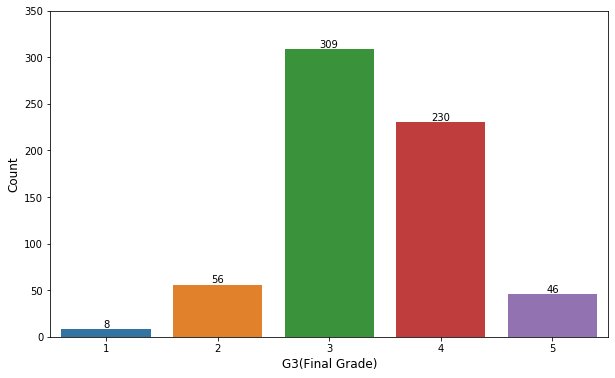

In [4]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_por['G3'])
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Oversampling

In [5]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [7]:
X_train.shape

(519, 42)

In [8]:
sm = SMOTE(k_neighbors = 3,random_state = 42)

In [9]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [10]:
X_train.shape

(1235, 42)

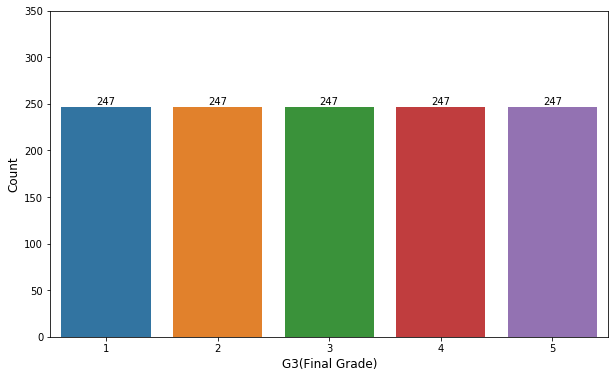

In [11]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Logistic Regression

In [12]:
model = LogisticRegression()

In [13]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.5708502  0.79352227 0.82591093 0.80161943 0.78947368]
Mean Accuracy: 0.76
Standard Deviation: 0.09


In [14]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.17      0.27      0.21        11
           3       0.57      0.50      0.53        62
           4       0.52      0.57      0.54        46
           5       0.29      0.22      0.25         9

    accuracy                           0.48       130
   macro avg       0.31      0.31      0.31       130
weighted avg       0.49      0.48      0.48       130



In [16]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,4
1,5,5
2,4,4
3,3,4
4,4,3


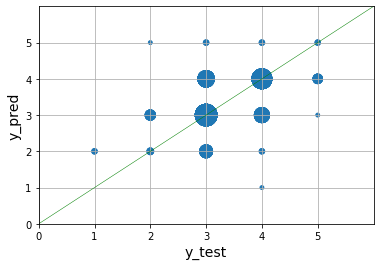

In [17]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
mean_absolute_error(y_pred,y_test)

0.5923076923076923

In [19]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [20]:
rmse(y_pred,y_test)

0.8726617108241094

## SVM

In [21]:
model = SVC()

In [22]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.58299595 0.68016194 0.73279352 0.7611336  0.74089069]
Mean Accuracy: 0.70
Standard Deviation: 0.06


In [23]:
parameters = [{'C':[1,10,100],'kernel':['linear']},
              {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.5,0.1,0.001]}]

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [24]:
grid_search.best_score_
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [25]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.70040486 0.82995951 0.87449393 0.91093117 0.94736842]
Mean Accuracy: 0.85
Standard Deviation: 0.09


In [26]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.20      0.09      0.13        11
           3       0.60      0.74      0.66        62
           4       0.54      0.54      0.54        46
           5       0.00      0.00      0.00         9

    accuracy                           0.55       130
   macro avg       0.27      0.28      0.27       130
weighted avg       0.49      0.55      0.52       130



In [28]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3,4
1,3,5
2,4,4
3,4,4
4,4,3


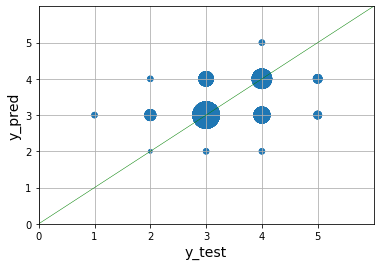

In [29]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [30]:
mean_absolute_error(y_pred,y_test)

0.5230769230769231

In [31]:
rmse(y_pred,y_test)

0.8227533512074423

## KNN

In [32]:
model = KNeighborsClassifier()

In [33]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.72064777 0.73684211 0.76923077 0.76923077 0.81781377]
Mean Accuracy: 0.76
Standard Deviation: 0.03


In [34]:
parameters = {'n_neighbors':[2,5,10,20],'p':[1,3,5]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [35]:
grid_search.best_score_
grid_search.best_params_

{'n_neighbors': 2, 'p': 1}

In [36]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.74089069 0.77732794 0.78947368 0.83805668 0.86639676]
Mean Accuracy: 0.80
Standard Deviation: 0.04


In [37]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.14      0.36      0.21        11
           3       0.48      0.45      0.47        62
           4       0.48      0.33      0.39        46
           5       0.12      0.11      0.12         9

    accuracy                           0.38       130
   macro avg       0.29      0.35      0.29       130
weighted avg       0.43      0.38      0.39       130



In [39]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,4
1,3,5
2,5,4
3,4,4
4,4,3


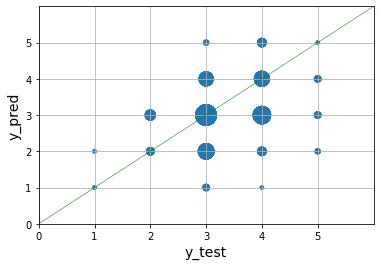

In [40]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [41]:
mean_absolute_error(y_pred,y_test)

0.7692307692307693

In [42]:
rmse(y_pred,y_test)

1.0524696231684352

## Decision Tree Classifier

In [43]:
model = DecisionTreeClassifier()

In [44]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.60323887 0.74089069 0.77327935 0.77732794 0.81781377]
Mean Accuracy: 0.74
Standard Deviation: 0.07


In [45]:
parameters = {'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1, 5, 10],'max_features':[2,5,11]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [46]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 15,
 'max_features': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [47]:
model = DecisionTreeClassifier(max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.57894737 0.74089069 0.77327935 0.77327935 0.83805668]
Mean Accuracy: 0.74
Standard Deviation: 0.09


In [48]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.18      0.27      0.21        11
           3       0.47      0.34      0.39        62
           4       0.44      0.46      0.45        46
           5       0.11      0.22      0.15         9

    accuracy                           0.36       130
   macro avg       0.24      0.26      0.24       130
weighted avg       0.40      0.36      0.37       130



In [50]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,4
1,5,5
2,4,4
3,3,4
4,5,3


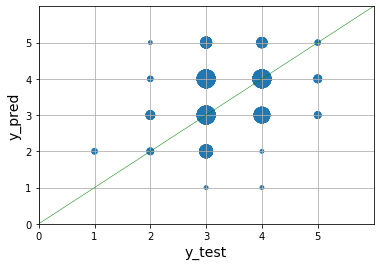

In [51]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [52]:
mean_absolute_error(y_pred,y_test)

0.7846153846153846

In [53]:
rmse(y_pred,y_test)

1.0524696231684352

## Random Forest Classifier

In [54]:
model = RandomForestClassifier()

In [55]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.72874494 0.82186235 0.87854251 0.87449393 0.89473684]
Mean Accuracy: 0.84
Standard Deviation: 0.06


In [56]:
parameters = {'n_estimators':[100,500,1000],'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1,5,10]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [57]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [58]:
model = RandomForestClassifier(n_estimators = 500,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.7611336  0.84210526 0.87854251 0.87854251 0.89878543]
Mean Accuracy: 0.85
Standard Deviation: 0.05


In [59]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.18      0.21        11
           3       0.62      0.65      0.63        62
           4       0.54      0.63      0.58        46
           5       0.50      0.11      0.18         9

    accuracy                           0.55       130
   macro avg       0.38      0.31      0.32       130
weighted avg       0.54      0.55      0.54       130



In [61]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,4
1,3,5
2,4,4
3,4,4
4,4,3


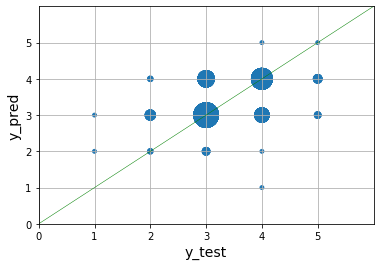

In [62]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [63]:
mean_absolute_error(y_pred,y_test)

0.5153846153846153

In [64]:
rmse(y_pred,y_test)

0.818065259762795

## XGBoost

In [65]:
model = XGBClassifier()

In [66]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.65991903 0.81781377 0.81376518 0.84210526 0.84615385]
Mean Accuracy: 0.80
Standard Deviation: 0.07


In [67]:
parameters = {'learning_rate':[0.01,0.1,0.5,1],'gamma':[0.5,0.1,0.001],'max_depth':[2,10,20]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [68]:
grid_search.best_score_
grid_search.best_params_

{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 10}

In [69]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.001,max_depth = 10)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.70850202 0.82186235 0.85020243 0.88259109 0.8582996 ]
Mean Accuracy: 0.82
Standard Deviation: 0.06


In [70]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.36      0.30        11
           3       0.63      0.65      0.64        62
           4       0.57      0.52      0.55        46
           5       0.25      0.22      0.24         9

    accuracy                           0.54       130
   macro avg       0.34      0.35      0.34       130
weighted avg       0.54      0.54      0.54       130



In [72]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,4
1,5,5
2,4,4
3,4,4
4,4,3


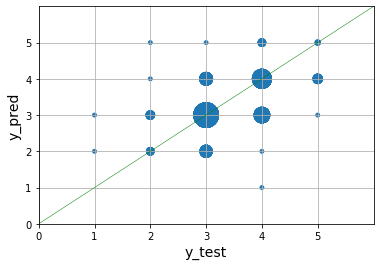

In [73]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [74]:
mean_absolute_error(y_pred,y_test)

0.5307692307692308

In [75]:
rmse(y_pred,y_test)

0.8366600265340756

## Stacking

In [76]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,stratify = y_train,random_state = 42)

### Base Models 

In [77]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
model.fit(X_base,y_base)

y_pred_svm_meta = model.predict(X_meta)
y_pred_svm_test = model.predict(X_test)

In [78]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
model.fit(X_base,y_base)

y_pred_knn_meta = model.predict(X_meta)
y_pred_knn_test = model.predict(X_test)

In [79]:
model = DecisionTreeClassifier(max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [80]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [81]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.1,max_depth = 10)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [82]:
y_pred_svm_meta = pd.DataFrame(y_pred_svm_meta)
y_pred_knn_meta = pd.DataFrame(y_pred_knn_meta)
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)

df_X_meta = pd.concat([y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta],axis = 1)
df_X_meta.columns = ['y_pred_svm_meta','y_pred_knn_meta','y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta']

df_X_meta.head()

,y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta
0,1,1,1,1,1
1,1,1,1,1,1
2,3,3,3,3,3
3,5,4,5,4,5
4,1,1,1,1,1


In [83]:
y_pred_svm_test = pd.DataFrame(y_pred_svm_test)
y_pred_knn_test = pd.DataFrame(y_pred_knn_test)
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)

df_X_test = pd.concat([y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test],axis = 1)
df_X_test.columns = ['y_pred_svm_test','y_pred_knn_test','y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test']

df_X_test.head()

,y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test
0,4,4,4,4,4
1,5,4,4,4,5
2,4,5,3,4,4
3,4,4,3,4,4
4,4,4,4,4,4


### Meta Model 

In [84]:
model = LogisticRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [85]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,4,4
1,4,5
2,4,4
3,4,4
4,4,3


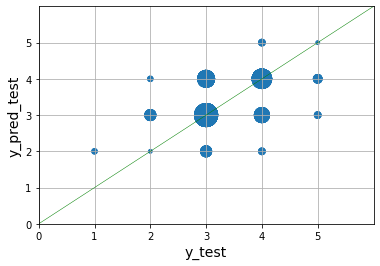

In [86]:
c = Counter(zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred_test'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [87]:
mean_absolute_error(y_pred_test,y_test)

0.5846153846153846

In [88]:
rmse(y_pred_test,y_test)

0.8412444993533733